In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/10_Oct.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.500000,70.000000,1,1,0,2778.0,2744.0,2782.0,3085.0,3280.0,3160.0,2752.083333,2701.0
1,26.333333,70.500000,1,1,0,2747.0,2758.0,2777.0,3063.0,3255.0,3181.0,2745.083333,2693.0
2,26.166667,71.000000,1,1,0,2743.0,2765.0,2779.0,3061.0,3281.0,3223.0,2736.500000,2676.0
3,26.000000,71.500000,1,1,0,2705.0,2765.0,2763.0,3033.0,3257.0,3226.0,2728.250000,2664.0
4,25.833333,72.000000,2,1,0,2701.0,2778.0,2744.0,3045.0,3241.0,3191.0,2722.000000,2669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,21.622452,82.539116,23,5,1,2176.0,2229.0,2304.0,2158.0,1800.0,2184.0,2193.916667,2138.0
8924,21.622452,82.539116,24,5,1,2143.0,2206.0,2275.0,2140.0,1795.0,2166.0,2180.500000,2114.0
8925,21.622452,82.539116,24,5,1,2153.0,2189.0,2257.0,2108.0,1775.0,2152.0,2165.916667,2082.0
8926,21.400000,82.539116,24,5,1,2141.0,2183.0,2237.0,2111.0,1772.0,2146.0,2153.416667,2087.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,2.466153,1.967466,0.928914
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,2.388562,2.031697,0.907139
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,2.469256,2.160157,0.880438
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,2.394769,2.169333,0.854774
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,2.345111,2.062283,0.835332


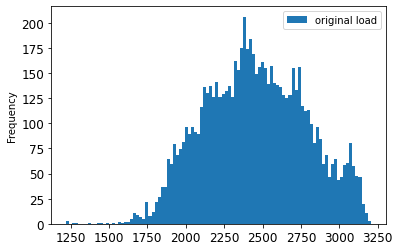

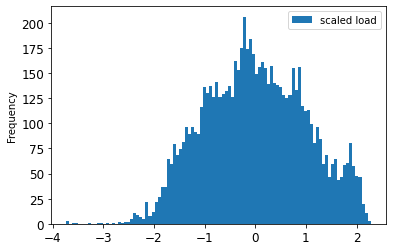

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

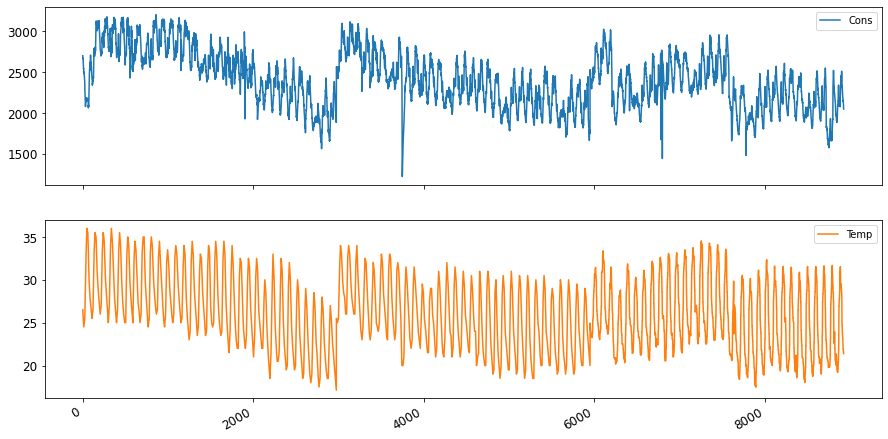

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,2.466153,1.967466,0.928914,0.424042
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,2.388562,2.031697,0.907139,0.336069
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,2.469256,2.160157,0.880438,0.248097
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,2.394769,2.169333,0.854774,0.205627
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,2.345111,2.062283,0.835332,0.169224
5,0.587854,-0.185879,0.795556,-1.516457,-1.457338,-1.633145,0.728815,0.891507,0.923800,1.667847,2.205448,1.946056,0.806298,0.084285
6,0.551451,-0.225772,0.828981,-1.516457,-1.457338,-1.633145,0.677160,0.879335,0.945135,1.612062,2.171308,1.958291,0.772338,0.026648
7,0.481680,-0.265665,0.862406,-1.516457,-1.457338,-1.633145,0.640698,0.763696,0.945135,1.556278,2.062681,1.866533,0.732417,-0.024923
8,0.408875,-0.305558,0.895831,-1.372011,-1.457338,-1.633145,0.655890,0.751523,0.984756,1.457106,2.009919,1.793127,0.682903,-0.073459
9,0.275399,-0.345450,0.929257,-1.372011,-1.457338,-1.633145,0.586004,0.727178,0.890274,1.323843,1.910603,1.640197,0.630020,-0.115929


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,0.754699,0.013586,0.628430,-1.660902,-1.457338,-1.633145,0.987091,0.882378,0.996948,1.912678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699
1,0.730431,-0.026307,0.661855,-1.660902,-1.457338,-1.633145,0.892896,0.924982,0.981709,1.844497,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431
2,0.678860,-0.066200,0.695280,-1.660902,-1.457338,-1.633145,0.880742,0.946284,0.987804,1.838299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860
3,0.642458,-0.106093,0.728706,-1.660902,-1.457338,-1.633145,0.765278,0.946284,0.939039,1.751523,...,NaN,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458
4,0.657625,-0.145986,0.762131,-1.516457,-1.457338,-1.633145,0.753124,0.985844,0.881131,1.788713,...,NaN,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625
5,0.587854,-0.185879,0.795556,-1.516457,-1.457338,-1.633145,0.728815,0.891507,0.923800,1.667847,...,NaN,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854
6,0.551451,-0.225772,0.828981,-1.516457,-1.457338,-1.633145,0.677160,0.879335,0.945135,1.612062,...,NaN,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451
7,0.481680,-0.265665,0.862406,-1.516457,-1.457338,-1.633145,0.640698,0.763696,0.945135,1.556278,...,NaN,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680
8,0.408875,-0.305558,0.895831,-1.372011,-1.457338,-1.633145,0.655890,0.751523,0.984756,1.457106,...,NaN,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875
9,0.275399,-0.345450,0.929257,-1.372011,-1.457338,-1.633145,0.586004,0.727178,0.890274,1.323843,...,0.754699,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,0.287533,-0.385343,0.962682,-1.372011,-1.457338,-1.633145,0.549541,0.675445,0.878083,1.342438,...,0.730431,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399,0.287533
11,0.284499,-0.425236,0.996107,-1.372011,-1.457338,-1.633145,0.479655,0.638927,0.762266,1.271158,...,0.678860,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399,0.287533,0.284499
12,0.208660,-0.465129,1.029532,-1.227565,-1.457338,-1.633145,0.406730,0.654143,0.750074,1.221572,...,0.642458,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399,0.287533,0.284499,0.208660
13,0.172258,-0.445183,1.012820,-1.227565,-1.457338,-1.633145,0.273034,0.584151,0.725692,1.178184,...,0.657625,0.587854,0.551451,0.481680,0.408875,0.275399,0.287533,0.284499,0.208660,0.172258
14,0.096419,-0.425236,0.996107,-1.227565,-1.457338,-1.633145,0.285188,0.547633,0.673879,1.131697,...,0.587854,0.551451,0.481680,0.408875,0.275399,0.287533,0.284499,0.208660,0.172258,0.096419


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 10 to 7292
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7283 non-null   float64
 1   Temp           7283 non-null   float64
 2   Hum            7283 non-null   float64
 3   A              7283 non-null   float64
 4   B              7283 non-null   float64
 5   C              7283 non-null   float64
 6   D              7283 non-null   float64
 7   E              7283 non-null   float64
 8   F              7283 non-null   float64
 9   G              7283 non-null   float64
 10  H              7283 non-null   float64
 11  I              7283 non-null   float64
 12  J              7283 non-null   float64
 13  y_t+100        7283 non-null   float64
 14  Cons_t-10      7283 non-null   float64
 15  Cons_t-9       7283 non-null   float64
 16  Cons_t-8       7283 non-null   float64
 17  Cons_t-7       7283 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.125030
11,-0.143231
12,-0.194801
13,-0.340412
14,-0.267606
...,...
7288,0.596954
7289,0.548418
7290,0.475613
7291,0.363371


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,0.287533,0.287533,0.275399,0.408875,0.481680,0.551451,0.587854,0.657625,0.642458,0.678860,...,-1.372011,-1.457338,-1.633145,0.549541,0.675445,0.878083,1.342438,1.805079,1.533147,0.579211
11,0.284499,0.284499,0.287533,0.275399,0.408875,0.481680,0.551451,0.587854,0.657625,0.642458,...,-1.372011,-1.457338,-1.633145,0.479655,0.638927,0.762266,1.271158,1.786457,1.545381,0.537993
12,0.208660,0.208660,0.284499,0.287533,0.275399,0.408875,0.481680,0.551451,0.587854,0.657625,...,-1.227565,-1.457338,-1.633145,0.406730,0.654143,0.750074,1.221572,1.767835,1.517854,0.491331
13,0.172258,0.172258,0.208660,0.284499,0.287533,0.275399,0.408875,0.481680,0.551451,0.587854,...,-1.227565,-1.457338,-1.633145,0.273034,0.584151,0.725692,1.178184,1.625068,1.401627,0.443632
14,0.096419,0.096419,0.172258,0.208660,0.284499,0.287533,0.275399,0.408875,0.481680,0.551451,...,-1.227565,-1.457338,-1.633145,0.285188,0.547633,0.673879,1.131697,1.562996,1.444447,0.393860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,0.636391,0.636391,0.697062,0.697062,0.694028,0.766833,0.763800,0.742565,0.848739,0.915477,...,1.516906,-0.949581,0.612315,0.765278,0.912809,1.128004,-0.027377,0.079460,0.193484,0.823666
7289,0.569653,0.569653,0.636391,0.697062,0.697062,0.694028,0.766833,0.763800,0.742565,0.848739,...,1.516906,-0.949581,0.612315,0.692353,0.845860,0.972565,0.025308,0.169465,0.101726,0.788929
7290,0.578753,0.578753,0.569653,0.636391,0.697062,0.697062,0.694028,0.766833,0.763800,0.742565,...,1.516906,-0.949581,0.612315,0.695391,0.739351,0.926848,0.071795,0.203605,0.208777,0.758858
7291,0.612122,0.612122,0.578753,0.569653,0.636391,0.697062,0.697062,0.694028,0.766833,0.763800,...,1.516906,-0.949581,0.612315,0.695391,0.760653,1.012187,0.102787,0.169465,0.245480,0.724380


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7283,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,2520.0,25.592451,79.040030,1.0,4.0,1.0,2633.0,2682.0,2710.0,2499.0,2396.0,2438.0,2636.916667
7394,2537.0,25.052451,81.540122,1.0,4.0,1.0,2609.0,2688.0,2701.0,2485.0,2393.0,2435.0,2623.250000
7395,2498.0,24.512451,84.040215,1.0,4.0,1.0,2572.0,2689.0,2678.0,2472.0,2371.0,2426.0,2608.250000
7396,2507.0,24.512451,84.040215,2.0,4.0,1.0,2551.0,2649.0,2671.0,2451.0,2368.0,2426.0,2594.583333
7397,2489.0,24.512451,84.040215,2.0,4.0,1.0,2520.0,2633.0,2682.0,2413.0,2346.0,2398.0,2578.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,2145.0,20.942451,84.504820,24.0,6.0,1.0,2179.0,2204.0,2265.0,2193.0,2162.0,2141.0,2203.333333
8350,2140.0,20.252450,84.504820,24.0,6.0,1.0,2194.0,2211.0,2263.0,2185.0,2156.0,2124.0,2193.083333
8351,2124.0,20.252450,88.121990,24.0,6.0,1.0,2191.0,2208.0,2248.0,2168.0,2138.0,2113.0,2182.750000
8352,2075.0,20.252450,88.121990,1.0,7.0,0.0,2177.0,2188.0,2232.0,2128.0,2088.0,2058.0,2169.666667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,0.399760,0.497798,1.576530
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,0.390016,0.487937,1.525495
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,0.318567,0.458355,1.469481
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,0.308824,0.458355,1.418445
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,0.237374,0.366322,1.358386
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,0.191906,0.287437,1.281210
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,0.208144,0.224986,1.205280
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,0.100970,0.201978,1.138685
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,0.039263,0.159248,1.072713
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,0.049006,0.093510,1.015142


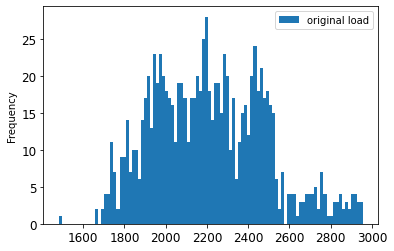

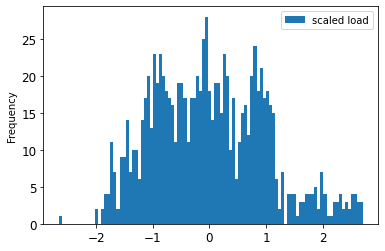

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,0.399760,0.497798,1.576530,1.041651
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,0.390016,0.487937,1.525495,0.961548
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,0.318567,0.458355,1.469481,0.888727
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,0.308824,0.458355,1.418445,0.896009
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,0.237374,0.366322,1.358386,0.797701
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,0.191906,0.287437,1.281210,0.746727
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,0.208144,0.224986,1.205280,0.717598
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,0.100970,0.201978,1.138685,0.568316
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,0.039263,0.159248,1.072713,0.539188
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,0.049006,0.093510,1.015142,0.317085


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,1.121753,0.172067,0.872770,-1.658081,-0.170444,0.502925,1.520294,1.680783,1.763739,0.856237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753
7394,1.183651,0.045857,1.017937,-1.658081,-0.170444,0.502925,1.433222,1.702426,1.731469,0.809191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651
7395,1.041651,-0.080353,1.163104,-1.658081,-0.170444,0.502925,1.298987,1.706033,1.649003,0.765505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651
7396,1.074420,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.222800,1.561749,1.623905,0.694936,...,NaN,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420
7397,1.008881,-0.080353,1.163104,-1.513750,-0.170444,0.502925,1.110333,1.504035,1.663345,0.567238,...,NaN,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881
7398,0.830471,-0.123592,1.226985,-1.513750,-0.170444,0.502925,1.172008,1.417465,1.684858,0.500029,...,NaN,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471
7399,0.848676,-0.166831,1.290867,-1.513750,-0.170444,0.502925,1.030518,1.284002,1.688444,0.520192,...,NaN,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676
7400,0.812265,-0.166831,1.290867,-1.369419,-0.170444,0.502925,1.063169,1.208253,1.545024,0.493308,...,NaN,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265
7401,0.761291,-0.166831,1.290867,-1.369419,-0.170444,0.502925,0.997866,1.096433,1.487657,0.348809,...,NaN,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291
7402,0.772214,-0.290704,1.328418,-1.369419,-0.170444,0.502925,0.820095,1.157754,1.401605,0.392495,...,1.121753,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7403,0.699393,-0.414577,1.365968,-1.369419,-0.170444,0.502925,0.838235,1.017077,1.268943,0.372332,...,1.183651,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214,0.699393
7404,0.630214,-0.414577,1.365968,-1.225087,-0.170444,0.502925,0.801955,1.049541,1.193647,0.352169,...,1.041651,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214,0.699393,0.630214
7405,0.659342,-0.414577,1.365968,-1.225087,-0.170444,0.502925,0.751164,0.984613,1.082498,0.295042,...,1.074420,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214,0.699393,0.630214,0.659342
7406,0.612008,-0.430937,1.390749,-1.225087,-0.170444,0.502925,0.762048,0.807866,1.143451,0.274879,...,1.008881,0.830471,0.848676,0.812265,0.761291,0.772214,0.699393,0.630214,0.659342,0.612008
7407,0.601085,-0.447298,1.415531,-1.225087,-0.170444,0.502925,0.689488,0.825901,1.003617,0.274879,...,0.830471,0.848676,0.812265,0.761291,0.772214,0.699393,0.630214,0.659342,0.612008,0.601085


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,0.280674
7404,0.186007
7405,0.113187
7406,0.124110
7407,0.091340
...,...
8249,-0.243635
8250,-0.261840
8251,-0.320097
8252,-0.498507


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7403,0.699393,0.699393,0.772214,0.761291,0.812265,0.848676,0.830471,1.008881,1.074420,1.041651,...,-1.369419,-0.170444,0.502925,0.838235,1.017077,1.268943,0.372332,0.026272,0.054068,0.962862
7404,0.630214,0.630214,0.699393,0.772214,0.761291,0.812265,0.848676,0.830471,1.008881,1.074420,...,-1.225087,-0.170444,0.502925,0.801955,1.049541,1.193647,0.352169,-0.041930,-0.044539,0.911205
7405,0.659342,0.659342,0.630214,0.699393,0.772214,0.761291,0.812265,0.848676,0.830471,1.008881,...,-1.225087,-0.170444,0.502925,0.751164,0.984613,1.082498,0.295042,-0.035434,-0.037965,0.871684
7406,0.612008,0.612008,0.659342,0.630214,0.699393,0.772214,0.761291,0.812265,0.848676,0.830471,...,-1.225087,-0.170444,0.502925,0.762048,0.807866,1.143451,0.274879,-0.058168,-0.051113,0.822827
7407,0.601085,0.601085,0.612008,0.659342,0.630214,0.699393,0.772214,0.761291,0.812265,0.848676,...,-1.225087,-0.170444,0.502925,0.689488,0.825901,1.003617,0.274879,-0.080902,-0.054400,0.785173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,0.054930,0.054930,0.065853,0.251546,0.273392,0.226059,0.371700,0.429957,0.429957,0.495495,...,1.517204,0.386687,0.502925,0.217852,0.476013,0.670167,-0.084690,-0.233545,-0.646040,0.369733
8250,0.094981,0.094981,0.054930,0.065853,0.251546,0.273392,0.226059,0.371700,0.429957,0.429957,...,1.517204,0.386687,0.502925,0.265016,0.411085,0.605629,-0.081329,-0.207563,-0.550720,0.323366
8251,0.014879,0.014879,0.094981,0.054930,0.065853,0.251546,0.273392,0.226059,0.371700,0.429957,...,1.517204,0.386687,0.502925,0.243248,0.411085,0.602043,-0.121655,-0.233545,-0.540859,0.270463
8252,0.044007,0.044007,0.014879,0.094981,0.054930,0.065853,0.251546,0.273392,0.226059,0.371700,...,1.661535,0.386687,0.502925,0.058221,0.353372,0.548261,-0.209027,-0.279013,-0.590163,0.224718


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))
model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add((LSTM(64,activation='linear')))
#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 128)      0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 128)         0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 67,649
Trainable params: 67,649
Non-trainable params: 0
____________________________________________________

In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()

history = model.fit(X_train,
          y_train,
          batch_size=500,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
15/15 [==============================] - 1s 47ms/step - loss: 0.6313 - val_loss: 0.8789
Epoch 2/300
15/15 [==============================] - 0s 17ms/step - loss: 0.4182 - val_loss: 0.6302
Epoch 3/300
15/15 [==============================] - 0s 17ms/step - loss: 0.3422 - val_loss: 0.6047
Epoch 4/300
15/15 [==============================] - 0s 17ms/step - loss: 0.3022 - val_loss: 0.5895
Epoch 5/300
15/15 [==============================] - 0s 17ms/step - loss: 0.2825 - val_loss: 0.5937
Epoch 6/300
15/15 [==============================] - 0s 17ms/step - loss: 0.2662 - val_loss: 0.5690
Epoch 7/300
15/15 [==============================] - 0s 17ms/step - loss: 0.2548 - val_loss: 0.5450
Epoch 8/300
15/15 [==============================] - 0s 17ms/step - loss: 0.2456 - val_loss: 0.4997
Epoch 9/300
15/15 [==============================] - 0s 16ms/step - loss: 0.2374 - val_loss: 0.5886
Epoch 10/300
15/15 [==============================] - 0s 19ms/step - loss: 0.2307 - val_loss: 0.5349

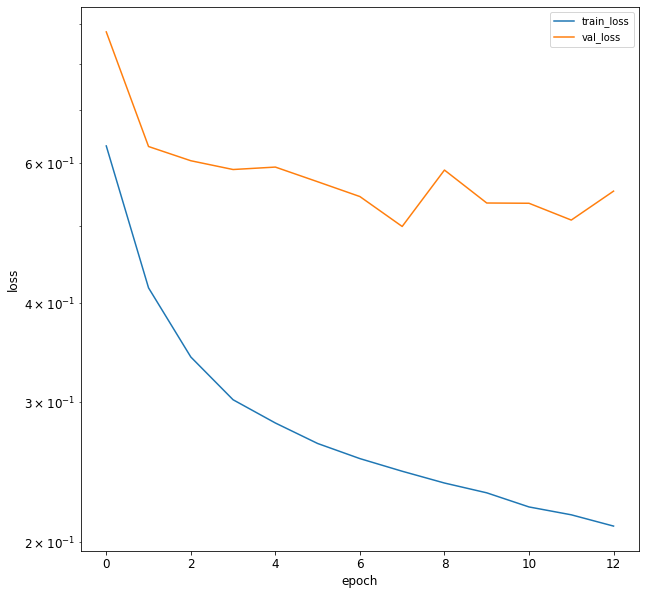

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,2050.0,19.897451,88.707785,1.0,7.0,0.0,2140.0,2194.0,2211.0,2087.0,2062.0,2036.0,2144.833333
8355,2038.0,19.542452,89.293580,1.0,7.0,0.0,2124.0,2191.0,2208.0,2088.0,2046.0,2015.0,2130.666667
8356,2007.0,19.542452,89.293580,2.0,7.0,0.0,2075.0,2177.0,2188.0,2056.0,2033.0,2007.0,2115.583333
8357,1994.0,19.542452,89.293580,2.0,7.0,0.0,2067.0,2145.0,2179.0,2066.0,2027.0,1996.0,2100.166667
8358,1985.0,19.407452,89.199140,2.0,7.0,0.0,2050.0,2140.0,2194.0,2043.0,2014.0,1973.0,2082.750000
8359,1957.0,19.272451,89.104700,2.0,7.0,0.0,2038.0,2124.0,2191.0,2029.0,1998.0,1961.0,2063.250000
8360,1967.0,19.272451,89.104700,3.0,7.0,0.0,2007.0,2075.0,2177.0,2028.0,1982.0,1940.0,2045.750000
8361,1958.0,19.272451,89.104700,3.0,7.0,0.0,1994.0,2067.0,2145.0,2016.0,1974.0,1947.0,2030.166667
8362,1949.0,20.157452,82.680825,3.0,7.0,0.0,1985.0,2050.0,2140.0,2004.0,1974.0,1935.0,2014.250000
8363,1950.0,21.042452,76.256950,3.0,7.0,0.0,1957.0,2038.0,2124.0,1989.0,1968.0,1920.0,1999.750000


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


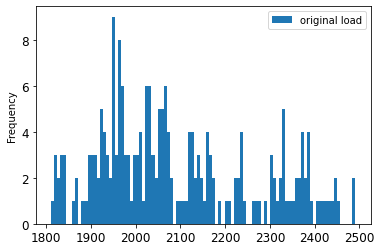

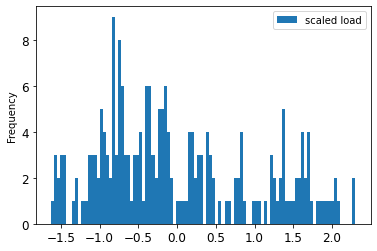

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.246443,-0.837383,1.295338,-1.498364,1.114783,-0.340279,0.251993,0.542999,0.618429,-0.633948,-0.784034,-0.876913,0.277281,-0.743527
8355,-0.315803,-0.918190,1.329310,-1.498364,1.114783,-0.340279,0.157908,0.524946,0.599926,-0.628676,-0.866947,-0.990231,0.189713,-0.726187
8356,-0.494985,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.130226,0.440695,0.476572,-0.797390,-0.934314,-1.033400,0.096478,-0.836008
8357,-0.570126,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.177269,0.248124,0.421062,-0.744667,-0.965407,-1.092757,0.001183,-0.934269
8358,-0.622146,-0.948920,1.323833,-1.357685,1.114783,-0.340279,-0.277234,0.218034,0.513578,-0.865931,-1.032774,-1.216866,-0.106474,-0.841788
8359,-0.783987,-0.979650,1.318356,-1.357685,1.114783,-0.340279,-0.347798,0.121748,0.495075,-0.939743,-1.115687,-1.281619,-0.227009,-0.922709
8360,-0.726187,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.530087,-0.173127,0.408727,-0.945016,-1.198601,-1.394937,-0.335182,-0.963169
8361,-0.778207,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.606531,-0.221270,0.211360,-1.008284,-1.240057,-1.357164,-0.431507,-1.032530
8362,-0.830228,-0.778200,0.945812,-1.217006,1.114783,-0.340279,-0.659454,-0.323574,0.180522,-1.071552,-1.240057,-1.421917,-0.529893,-1.032530
8363,-0.824448,-0.576750,0.573268,-1.217006,1.114783,-0.340279,-0.824102,-0.395789,0.081838,-1.150637,-1.271150,-1.502858,-0.619521,-1.055650


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.246443,-0.837383,1.295338,-1.498364,1.114783,-0.340279,0.251993,0.542999,0.618429,-0.633948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443
8355,-0.315803,-0.918190,1.329310,-1.498364,1.114783,-0.340279,0.157908,0.524946,0.599926,-0.628676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803
8356,-0.494985,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.130226,0.440695,0.476572,-0.797390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985
8357,-0.570126,-0.918190,1.329310,-1.357685,1.114783,-0.340279,-0.177269,0.248124,0.421062,-0.744667,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126
8358,-0.622146,-0.948920,1.323833,-1.357685,1.114783,-0.340279,-0.277234,0.218034,0.513578,-0.865931,...,NaN,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146
8359,-0.783987,-0.979650,1.318356,-1.357685,1.114783,-0.340279,-0.347798,0.121748,0.495075,-0.939743,...,NaN,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987
8360,-0.726187,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.530087,-0.173127,0.408727,-0.945016,...,NaN,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187
8361,-0.778207,-0.979650,1.318356,-1.217006,1.114783,-0.340279,-0.606531,-0.221270,0.211360,-1.008284,...,NaN,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207
8362,-0.830228,-0.778200,0.945812,-1.217006,1.114783,-0.340279,-0.659454,-0.323574,0.180522,-1.071552,...,NaN,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228
8363,-0.824448,-0.576750,0.573268,-1.217006,1.114783,-0.340279,-0.824102,-0.395789,0.081838,-1.150637,...,-0.246443,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8364,-0.922709,-0.576750,0.573268,-1.076327,1.114783,-0.340279,-0.765299,-0.582343,-0.220379,-1.166454,...,-0.315803,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448,-0.922709
8365,-0.905369,-0.576750,0.573268,-1.076327,1.114783,-0.340279,-0.818222,-0.660575,-0.269721,-1.224449,...,-0.494985,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448,-0.922709,-0.905369
8366,-0.974729,-0.558539,0.551648,-1.076327,1.114783,-0.340279,-0.871144,-0.714736,-0.374572,-1.256083,...,-0.570126,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448,-0.922709,-0.905369,-0.974729
8367,-0.992069,-0.540329,0.530029,-1.076327,1.114783,-0.340279,-0.865264,-0.883236,-0.448584,-1.208632,...,-0.622146,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448,-0.922709,-0.905369,-0.974729,-0.992069
8368,-0.997849,-0.540329,0.530029,-0.935648,1.114783,-0.340279,-0.965229,-0.823057,-0.639783,-1.203360,...,-0.783987,-0.726187,-0.778207,-0.830228,-0.824448,-0.922709,-0.905369,-0.974729,-0.992069,-0.997849


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-1.148131
8365,-1.171251
8366,-1.130790
8367,-1.148131
8368,-1.055650
...,...
8461,-1.512274
8462,-1.477594
8463,-1.442913
8464,-1.292632


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8364,-0.922709,-0.922709,-0.824448,-0.830228,-0.778207,-0.726187,-0.783987,-0.622146,-0.570126,-0.494985,...,-1.076327,1.114783,-0.340279,-0.765299,-0.582343,-0.220379,-1.166454,-1.374791,-1.486670,-0.692667
8365,-0.905369,-0.905369,-0.922709,-0.824448,-0.830228,-0.778207,-0.726187,-0.783987,-0.622146,-0.570126,...,-1.076327,1.114783,-0.340279,-0.818222,-0.660575,-0.269721,-1.224449,-1.333335,-1.529839,-0.760146
8366,-0.974729,-0.974729,-0.905369,-0.922709,-0.824448,-0.830228,-0.778207,-0.726187,-0.783987,-0.622146,...,-1.076327,1.114783,-0.340279,-0.871144,-0.714736,-0.374572,-1.256083,-1.452523,-1.616176,-0.825049
8367,-0.992069,-0.992069,-0.974729,-0.905369,-0.922709,-0.824448,-0.830228,-0.778207,-0.726187,-0.783987,...,-1.076327,1.114783,-0.340279,-0.865264,-0.883236,-0.448584,-1.208632,-1.582075,-1.556819,-0.885317
8368,-0.997849,-0.997849,-0.992069,-0.974729,-0.905369,-0.922709,-0.824448,-0.830228,-0.778207,-0.726187,...,-0.935648,1.114783,-0.340279,-0.965229,-0.823057,-0.639783,-1.203360,-1.540618,-1.578404,-0.930131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-1.032530,-1.032530,-0.963169,-0.922709,-0.841788,-0.934269,-0.836008,-0.726187,-0.743527,-0.668386,...,-1.076327,-0.952278,-0.340279,-0.976990,-0.762879,-0.473255,-1.430070,-1.234875,-1.308600,-0.847714
8462,-1.032530,-1.032530,-1.032530,-0.963169,-0.922709,-0.841788,-0.934269,-0.836008,-0.726187,-0.743527,...,-1.076327,-0.952278,-0.340279,-0.882905,-0.841111,-0.497926,-1.493338,-1.265968,-1.432709,-0.907466
8463,-1.055650,-1.055650,-1.032530,-1.032530,-0.963169,-0.922709,-0.841788,-0.934269,-0.836008,-0.726187,...,-1.076327,-0.952278,-0.340279,-0.965229,-0.823057,-0.621280,-1.509155,-1.219329,-1.567611,-0.958977
8464,-1.148131,-1.148131,-1.055650,-1.032530,-1.032530,-0.963169,-0.922709,-0.841788,-0.934269,-0.836008,...,-0.935648,-0.952278,-0.340279,-1.006391,-0.937397,-0.639783,-1.514427,-1.214147,-1.524443,-1.017184


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.3830220699310303s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2092.636792
dtype: float64
Cons    173.418364
dtype: float64


In [47]:
load_mean=2092.636792
load_std=173.418364
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8364,1893.529853
8365,1889.520385
8366,1896.536954
8367,1893.529853
8368,1909.567723
...,...
8461,1830.380740
8462,1836.394942
8463,1842.409143
8464,1868.470681


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[1900.3726],
       [1898.0356],
       [1896.2399],
       [1892.4761],
       [1913.9067],
       [1916.8386],
       [1914.3342],
       [1916.7054],
       [1929.9287],
       [1941.9453],
       [1959.2708],
       [1969.8362],
       [1992.0654],
       [2010.2863],
       [2023.1765],
       [2035.4503],
       [2057.026 ],
       [2055.0505],
       [2063.1445],
       [2072.3333],
       [2060.4446],
       [2081.005 ],
       [2111.6858],
       [2135.626 ],
       [2161.4194],
       [2142.3608],
       [2117.2693],
       [2130.6404],
       [2133.414 ],
       [2117.014 ],
       [2137.172 ],
       [2149.3855],
       [2158.171 ],
       [2154.2888],
       [2174.5688],
       [2195.381 ],
       [2198.8582],
       [2206.9412],
       [2202.867 ],
       [2221.342 ],
       [2210.2466],
       [2176.157 ],
       [2178.7073],
       [2194.4326],
       [2201.6428],
       [2227.5764],
       [2259.9062],
       [2276.0935],
       [2290.5747],
       [2288.6868],


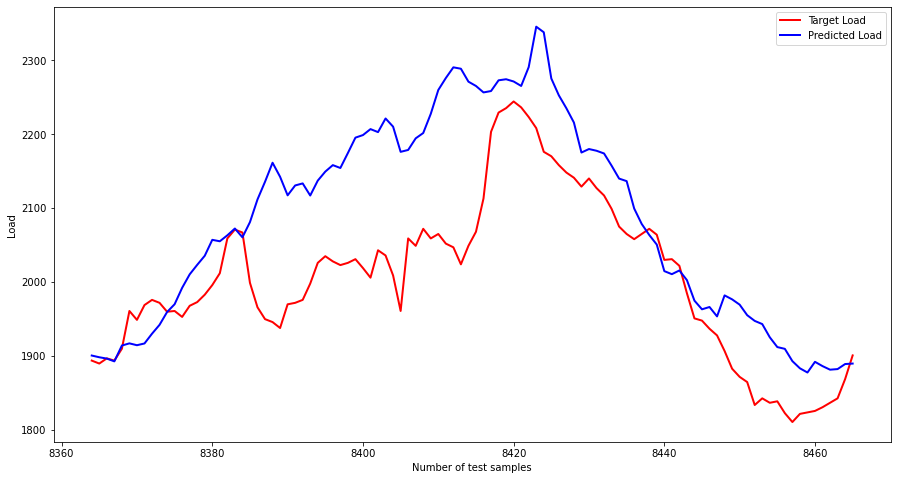

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

4.276158422604418


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -3.990588
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  189252.623922
8365  188851.587891
8366  189553.711019
8367  189253.040946
8368  190856.545055
...             ...
8461  182935.033062
8462  183537.053641
8463  184138.764237
8464  186745.977822
8465  189955.223825

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

          y_t+100
8364    46.822621
8365    72.509637
8366     0.088260
8367     1.110450
8368    18.827055
...           ...
8461  3098.202128
8462  2008.615729
8463  1569.156947
8464   415.022138
8465   122.233864

[102 rows x 1 columns]
y_t+100    11931.137784
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    109.229748
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1900.3726]
[1898.0356]
[1896.2399]
[1892.4761]
[1913.9067]
[1916.8386]
[1914.3342]
[1916.7054]
[1929.9287]
[1941.9453]
[1959.2708]
[1969.8362]
[1992.0654]
[2010.2863]
[2023.1765]
[2035.4503]
[2057.026]
[2055.0505]
[2063.1445]
[2072.3333]
[2060.4446]
[2081.005]
[2111.6858]
[2135.626]
[2161.4194]
[2142.3608]
[2117.2693]
[2130.6404]
[2133.414]
[2117.014]
[2137.172]
[2149.3855]
[2158.171]
[2154.2888]
[2174.5688]
[2195.381]
[2198.8582]
[2206.9412]
[2202.867]
[2221.342]
[2210.2466]
[2176.157]
[2178.7073]
[2194.4326]
[2201.6428]
[2227.5764]
[2259.9062]
[2276.0935]
[2290.5747]
[2288.6868]
[2271.1663]
[2265.342]
[2256.602]
[2258.467]
[2272.9985]
[2274.449]
[2271.411]
[2265.3545]
[2290.8672]
[2345.6067]
[2338.056]
[2275.477]
[2252.6624]
[2235.1782]
[2215.8328]
[2175.2004]
[2179.9565]
[2177.63]
[2173.9531]
[2157.485]
[2139.9387]
[2136.4902]
[2099.457]
[2078.5093]
[2063.6147]
[2050.5896]
[2014.677]
[2010.5264]
[2015.5404]
[2002.4775]
[1974.6964]
[1962.9545]
[1966.071]
[1953.3508]
[1981.7964]
[197